## Pattern Recognition on Time Series Data - Finding Outcomes using Matching Shapes

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
gold_df = pd.read_csv("SEK_USD (1).csv")
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df = gold_df.dropna(how='any')
gold_df

,Date,Price
0,2009-03-13,0.1159
1,2009-03-12,0.1161
2,2009-03-11,0.1143
3,2009-03-10,0.1126
4,2009-03-09,0.1087
...,...,...
4995,1990-01-08,0.1633
4996,1990-01-05,0.1614
4997,1990-01-04,0.1618
4998,1990-01-03,0.1598


In [4]:

gold_df.shape


(5000, 2)

In [5]:
print("Minimum date",np.min(gold_df['Date'] ))
print("Maximum date",np.max(gold_df['Date'] ))


Minimum date 1990-01-02 00:00:00
Maximum date 2009-03-13 00:00:00


In [6]:
# sort data by date
# As we are dealing with time series, we need to make sure that the data is in the correct order
gold_df = gold_df.sort_values('Date', ascending=True)


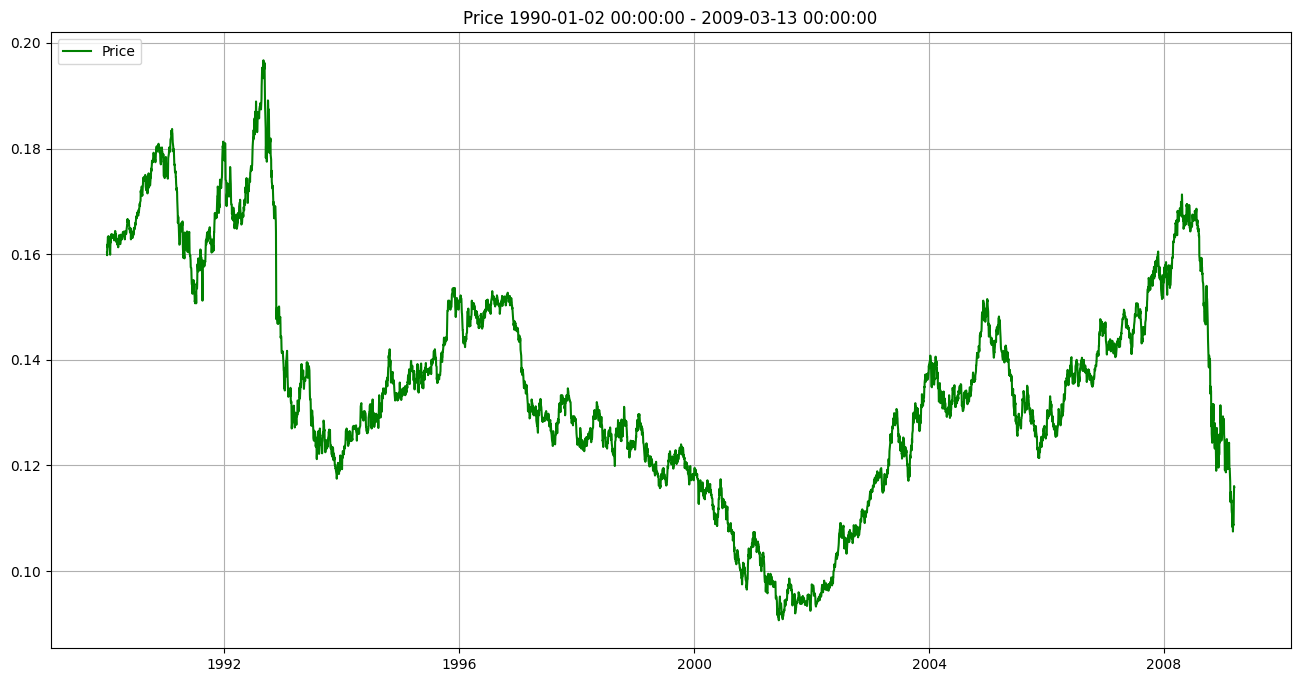

In [7]:
# Price chart
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gold_df['Date'], gold_df['Price'], label='Price', color='green')
plt.title('Price ' + str(np.min(gold_df['Date'])) + ' - ' + str(np.max(gold_df['Date'])))
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Create a sliding window over the time series data
Lets do it for 60 trading day series


In [9]:
lookback = 60 # this variable controls the size of the window
dates = gold_df['Date']
prices = list(gold_df['Price'].values)

counter_ = -1  # list starts at 0 index
price_series = []
for day in dates: # the step is one day but we need to wait until we get 30 days in a sequence
    counter_ += 1
    if counter_ >= lookback: # once we arrives 60 we starts appending the series (squential data)
        price_series.append(prices[counter_-lookback:counter_])

timeseries_df = pd.DataFrame(price_series)

In [10]:
timeseries_df.shape # rows: number of windows, number of columns is the window size

(4940, 60)

In [11]:
timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.1603,0.1598,0.1618,0.1614,0.1633,0.1628,0.1628,0.1629,0.1634,0.1630,...,0.1613,0.1617,0.1623,0.1629,0.1636,0.1627,0.1621,0.1621,0.1620,0.1619
1,0.1598,0.1618,0.1614,0.1633,0.1628,0.1628,0.1629,0.1634,0.1630,0.1624,...,0.1617,0.1623,0.1629,0.1636,0.1627,0.1621,0.1621,0.1620,0.1619,0.1620
2,0.1618,0.1614,0.1633,0.1628,0.1628,0.1629,0.1634,0.1630,0.1624,0.1627,...,0.1623,0.1629,0.1636,0.1627,0.1621,0.1621,0.1620,0.1619,0.1620,0.1623
3,0.1614,0.1633,0.1628,0.1628,0.1629,0.1634,0.1630,0.1624,0.1627,0.1614,...,0.1629,0.1636,0.1627,0.1621,0.1621,0.1620,0.1619,0.1620,0.1623,0.1630
4,0.1633,0.1628,0.1628,0.1629,0.1634,0.1630,0.1624,0.1627,0.1614,0.1610,...,0.1636,0.1627,0.1621,0.1621,0.1620,0.1619,0.1620,0.1623,0.1630,0.1637


### Smoothing the values in the window (Pattern simplifier)
#### This is important for pattern recognition

##### To do the pattern simplifier we need to create a function that split  a sequence into small partitions
We need a function that can split a sequence into small and equal partitions
Example given a sequence: seq= [1,2,3,4,5,6,7,8,9,10,11,12, 13]
then if we run split(seq,3), the output will be:

[1, 2, 3, 4]

[6, 7, 8, 9]

[10, 11, 12, 13]

The idea is then to take the average of every partition. For example we will replace [1,2,3,4] with its mean =2.5,  [6, 7, 8, 9] with 7.5 and [10, 11, 12, 13] with 12.5

In [ ]:
def split_seq(seq, num_pieces):
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop


In [ ]:
average_elements=5
complexity = lookback//average_elements
smoothed_series=[]
for index, row in timeseries_df.iterrows():
    smoothed_series.append([np.mean(r) for r in split_seq(list(row.values), complexity)])
smoothed_df = pd.DataFrame(smoothed_series)


In [ ]:
smoothed_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.16132,0.16298,0.16148,0.16248,0.16330,0.16364,0.16302,0.16398,0.16288,0.16220,0.16236,0.16216
1,0.16182,0.16290,0.16130,0.16294,0.16328,0.16352,0.16306,0.16408,0.16268,0.16190,0.16264,0.16202
2,0.16242,0.16288,0.16128,0.16302,0.16342,0.16344,0.16324,0.16392,0.16236,0.16188,0.16272,0.16206
3,0.16264,0.16258,0.16144,0.16322,0.16350,0.16336,0.16348,0.16350,0.16238,0.16186,0.16268,0.16224
4,0.16304,0.16210,0.16178,0.16332,0.16358,0.16316,0.16382,0.16310,0.16236,0.16200,0.16250,0.16258
...,...,...,...,...,...,...,...,...,...,...,...,...
4935,0.12798,0.12588,0.12822,0.12734,0.12154,0.12104,0.12298,0.12120,0.12076,0.11472,0.11202,0.10874
4936,0.12832,0.12596,0.12822,0.12684,0.12074,0.12194,0.12192,0.12212,0.11928,0.11394,0.11110,0.10880
4937,0.12800,0.12674,0.12792,0.12554,0.12036,0.12300,0.12148,0.12200,0.11766,0.11400,0.11008,0.10966
4938,0.12674,0.12732,0.12792,0.12376,0.12104,0.12336,0.12068,0.12188,0.11654,0.11350,0.10988,0.11040


### Create the required Template (ideal shape pattern)
Here we need to create the pattern that we are looking for such as local trends and minima. This can be done by creating a list with a given shape such as ups, downs, u's or v's

NOTE: the size of the template must be equal to the size of the window (after smoothing)


In [ ]:
# calculate the size of the window after smoothing:
smoothed_df.shape[1]

12

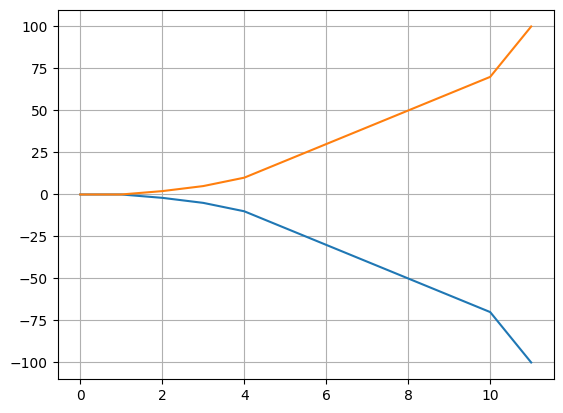

In [ ]:
# ngative trend template
local_pos_trend = [0,0,-2,-5,-10,-20,-30,-40,-50,-60,-70,-100]
local_pos_trend2 = [0,0,2,5,10,20,30,40,50,60,70,100]
template=local_pos_trend
template2=local_pos_trend2

plt.plot(local_pos_trend)
plt.plot(local_pos_trend2)

plt.grid()

### Create A function to measure the relationship between a window and a template
Simply we can use the pearson correlation function to find the best matching shape

In [ ]:
def pearson(s1, s2):
    """take two pd.Series objects and return a pearson corrleation"""
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    corr_per=np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))
    # or simply using Series.corr() function: s1.corr(s2)
    return corr_per

#### Next: compare the template with every row in the smoothed_df

In [ ]:
threshold=0.9
match_list = []
match_list2 = []

for index, row in smoothed_df.iterrows():

    matching_score = pearson(row,template)
    matching_score2 = pearson(row,template2)


    if matching_score > threshold:
        match_list.append(1)
    else:
        match_list.append(0)

    if matching_score2 > threshold:
        match_list2.append(2)
    else:
        match_list2.append(0)


In [ ]:
np.mean(match_list)
np.mean(match_list2)

0.1890688259109312

In [ ]:
# add the match value to every row
timeseries_df['outcome'] = match_list
timeseries_df['outcome2'] = match_list2

timeseries_df.tail(15)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,outcome,outcome2
4925,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,...,0.1197,0.1193,0.1193,0.1169,0.1131,0.1141,0.1145,0.1150,0,0
4926,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,...,0.1193,0.1193,0.1169,0.1131,0.1141,0.1145,0.1150,0.1130,0,0
4927,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,...,0.1193,0.1169,0.1131,0.1141,0.1145,0.1150,0.1130,0.1134,0,0
4928,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,...,0.1169,0.1131,0.1141,0.1145,0.1150,0.1130,0.1134,0.1116,0,0
4929,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,...,0.1131,0.1141,0.1145,0.1150,0.1130,0.1134,0.1116,0.1111,0,0
4930,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,0.1283,...,0.1141,0.1145,0.1150,0.1130,0.1134,0.1116,0.1111,0.1110,1,0
4931,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,0.1283,0.1266,...,0.1145,0.1150,0.1130,0.1134,0.1116,0.1111,0.1110,0.1084,1,0
4932,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,0.1283,0.1266,0.1247,...,0.1150,0.1130,0.1134,0.1116,0.1111,0.1110,0.1084,0.1083,1,0
4933,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,0.1283,0.1266,0.1247,0.1251,...,0.1130,0.1134,0.1116,0.1111,0.1110,0.1084,0.1083,0.1106,1,0
4934,0.1243,0.1249,0.1263,0.1314,0.1290,0.1283,0.1266,0.1247,0.1251,0.1275,...,0.1134,0.1116,0.1111,0.1110,0.1084,0.1083,0.1106,0.1075,1,0


In [ ]:
# let us go back to the original df and check its shape
gold_df.shape

(5000, 2)

In [ ]:
# check the smoothed_df shape
smoothed_df.shape

(4940, 12)

In [ ]:
# the only differnece is 60, to get the dates we just skip the first 30 days
timeseries_df['dates'] =  list(dates[60:])

In [ ]:
timeseries_df.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,outcome,outcome2,dates
4920,0.1255,0.1271,0.1247,0.1254,0.1235,0.1202,0.1219,0.1220,0.1210,0.1196,...,0.1208,0.1234,0.1243,0.1212,0.1197,0.1193,0.1193,0,0,2009-02-16
4921,0.1271,0.1247,0.1254,0.1235,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,...,0.1234,0.1243,0.1212,0.1197,0.1193,0.1193,0.1169,0,0,2009-02-17
4922,0.1247,0.1254,0.1235,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,...,0.1243,0.1212,0.1197,0.1193,0.1193,0.1169,0.1131,0,0,2009-02-18
4923,0.1254,0.1235,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,...,0.1212,0.1197,0.1193,0.1193,0.1169,0.1131,0.1141,0,0,2009-02-19
4924,0.1235,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,...,0.1197,0.1193,0.1193,0.1169,0.1131,0.1141,0.1145,0,0,2009-02-20
4925,0.1202,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,...,0.1193,0.1193,0.1169,0.1131,0.1141,0.1145,0.1150,0,0,2009-02-23
4926,0.1219,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,...,0.1193,0.1169,0.1131,0.1141,0.1145,0.1150,0.1130,0,0,2009-02-24
4927,0.1220,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,...,0.1169,0.1131,0.1141,0.1145,0.1150,0.1130,0.1134,0,0,2009-02-25
4928,0.1210,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,...,0.1131,0.1141,0.1145,0.1150,0.1130,0.1134,0.1116,0,0,2009-02-26
4929,0.1196,0.1240,0.1220,0.1224,0.1259,0.1243,0.1249,0.1263,0.1314,0.1290,...,0.1141,0.1145,0.1150,0.1130,0.1134,0.1116,0.1111,0,0,2009-02-27


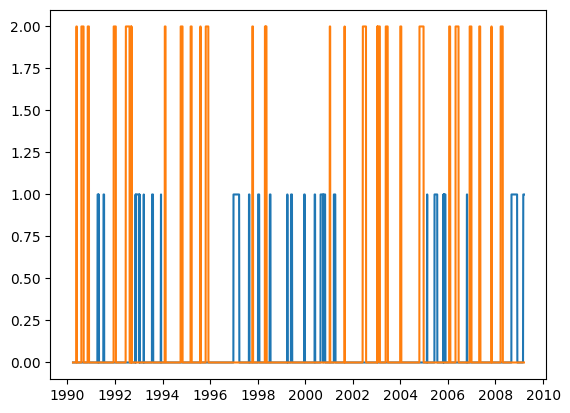

In [ ]:
plt.plot(timeseries_df.dates,timeseries_df.outcome)
plt.plot(timeseries_df.dates,timeseries_df.outcome2)

#### visulaize time series

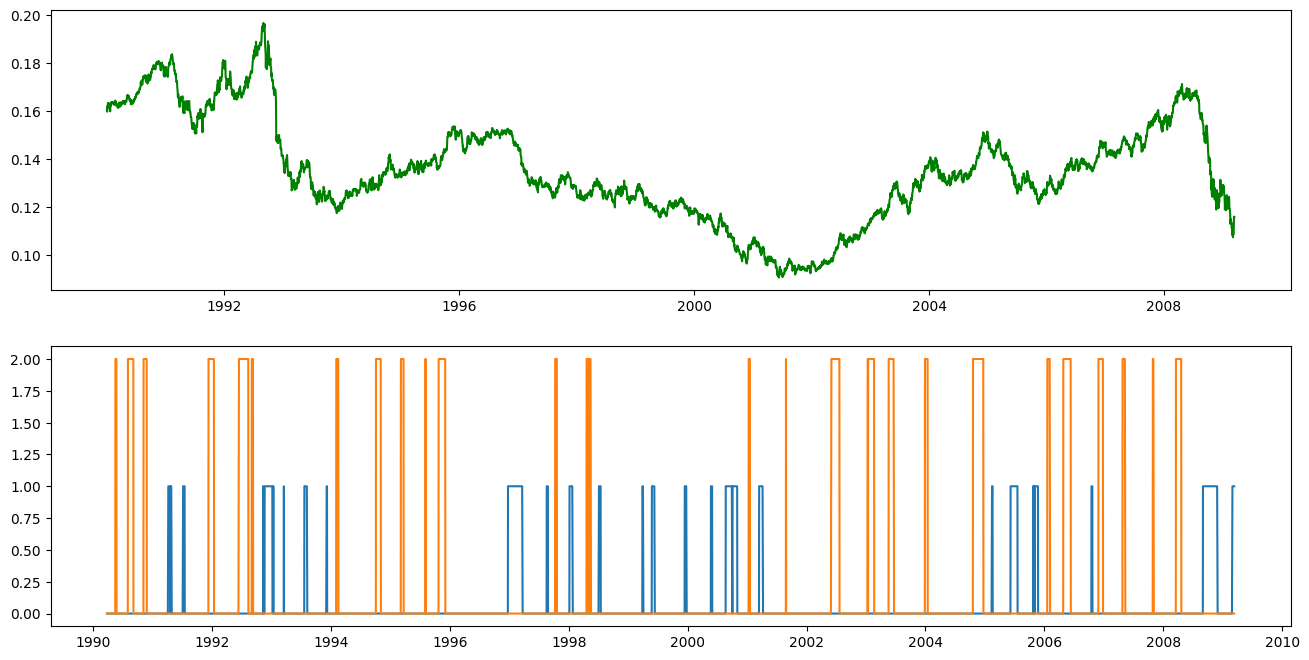

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.subplot(2,1,1)
plt.plot(gold_df['Date'], gold_df['Price'], label='Price', color='green')
plt.subplot(2,1,2)
plt.plot(timeseries_df.dates,timeseries_df.outcome)
plt.plot(timeseries_df.dates,timeseries_df.outcome2)